In [65]:
from google.colab import files

# Upload dataset
uploaded = files.upload()


Saving IRIS.csv to IRIS.csv


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [67]:
# Load dataset
df = pd.read_csv("IRIS.csv")

# Display first 5 rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


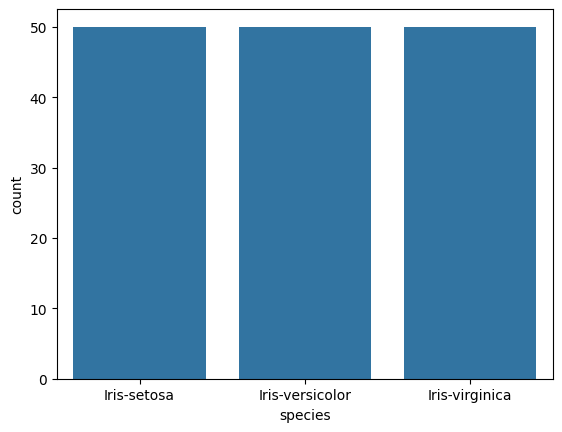

In [68]:
# Check dataset info
df.info()

# Check for missing values
print(df.isnull().sum())

# Check class distribution
print(df["species"].value_counts())

# Visualize the class distribution
sns.countplot(x="species", data=df)
plt.show()


In [69]:
# Encode species labels into numeric values
encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"])

# Define features (X) and target variable (y)
X = df.drop("species", axis=1)
y = df["species"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



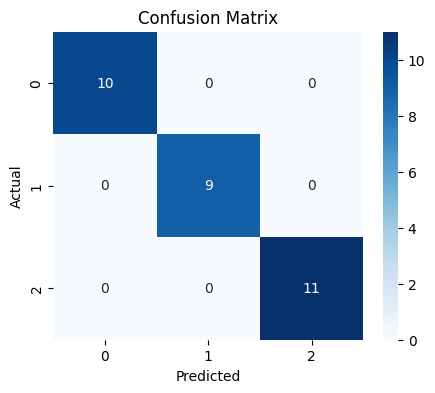

In [71]:
# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [73]:
# Example new data
new_sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)  # Ensure column names match

# Predict species
predicted_class = model.predict(new_sample)
print("Predicted species:", encoder.inverse_transform(predicted_class))


Predicted species: ['Iris-setosa']
